In [72]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [58]:
df=pd.read_csv('data/PJME_hourly.csv')
df=df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

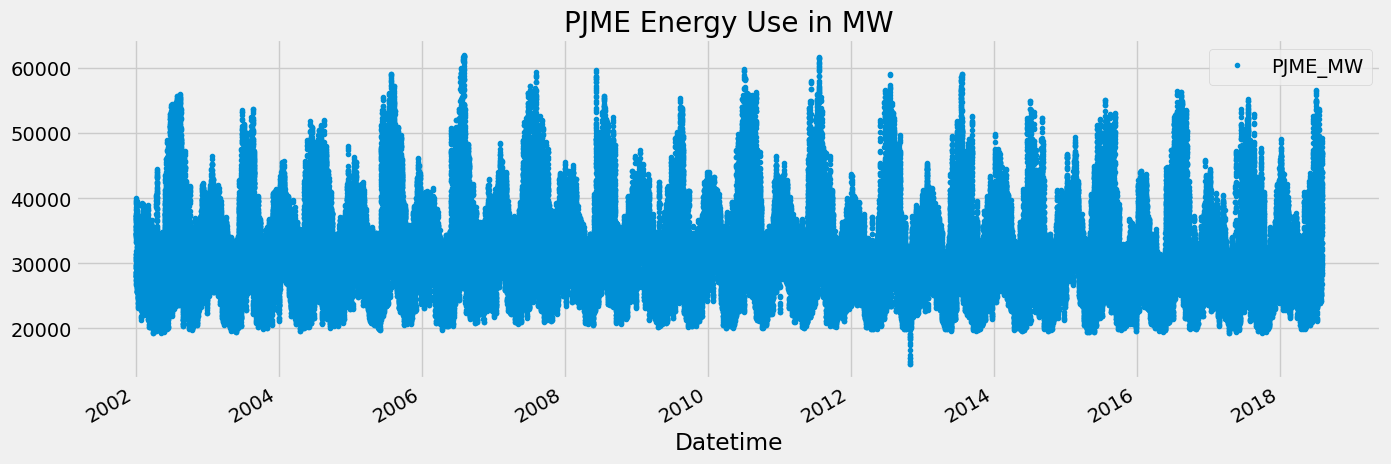

In [59]:
df.plot(style='.',
        figsize=(15, 5),
         color=color_pal[0],
          title='PJME Energy Use in MW')
plt.show()

In [60]:
df.index = pd.to_datetime(df.index)

# Train/Test Split

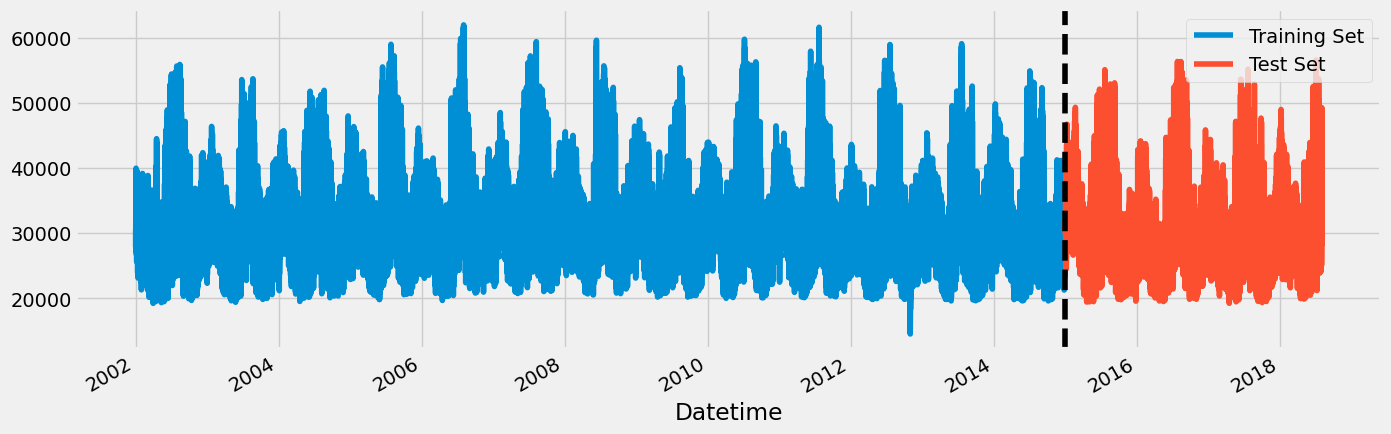

In [61]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training Set')
test.plot(ax=ax, label='Testing Set')
ax.axvline('01-01-2015', color ='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

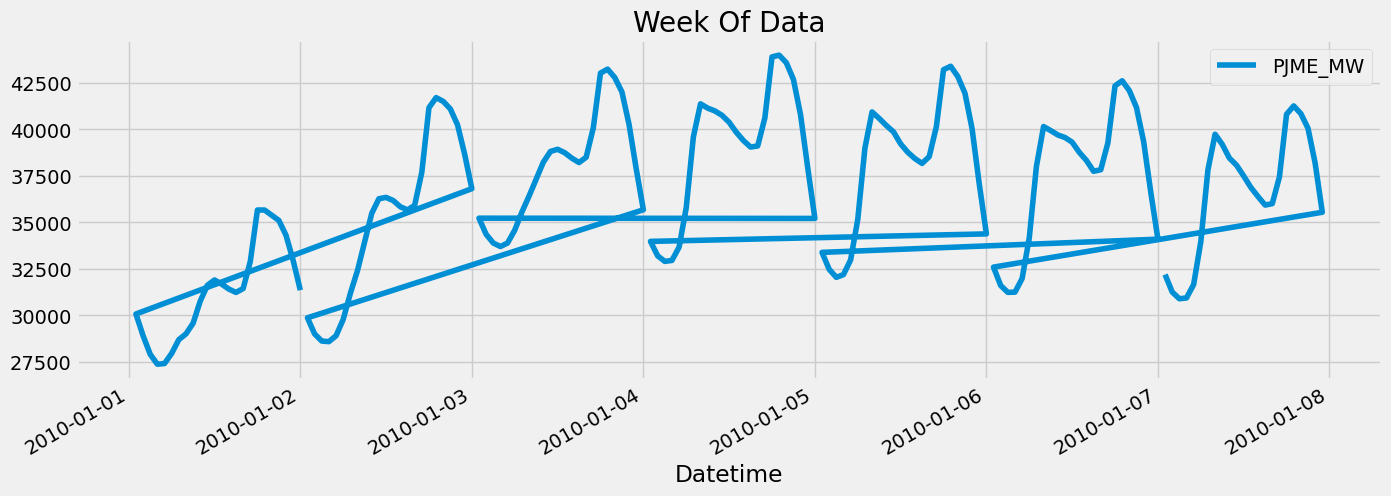

In [62]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

# Feature Creation

In [63]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df= df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] =df.index.month
    df['year'] =df.index.year
    df['dayofyear'] =df.index.dayofyear
    return df

df= create_features(df)

# Visualize our Feature / Target Relationship

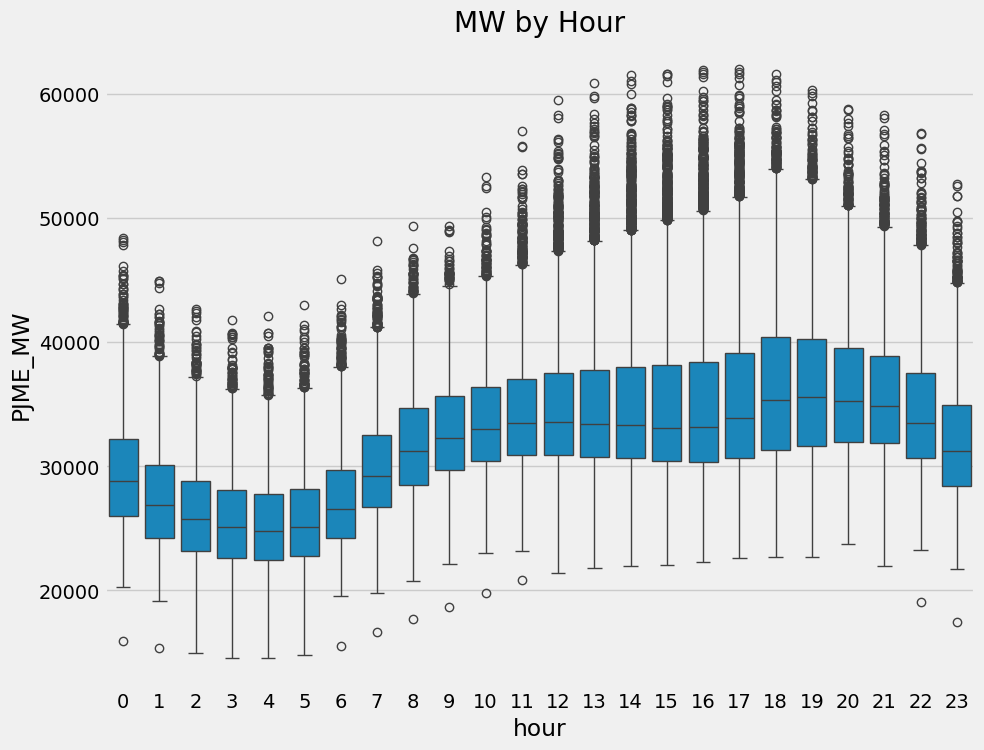

In [64]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

C:\Users\Ashton\AppData\Local\Temp\ipykernel_30772\2810743256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')


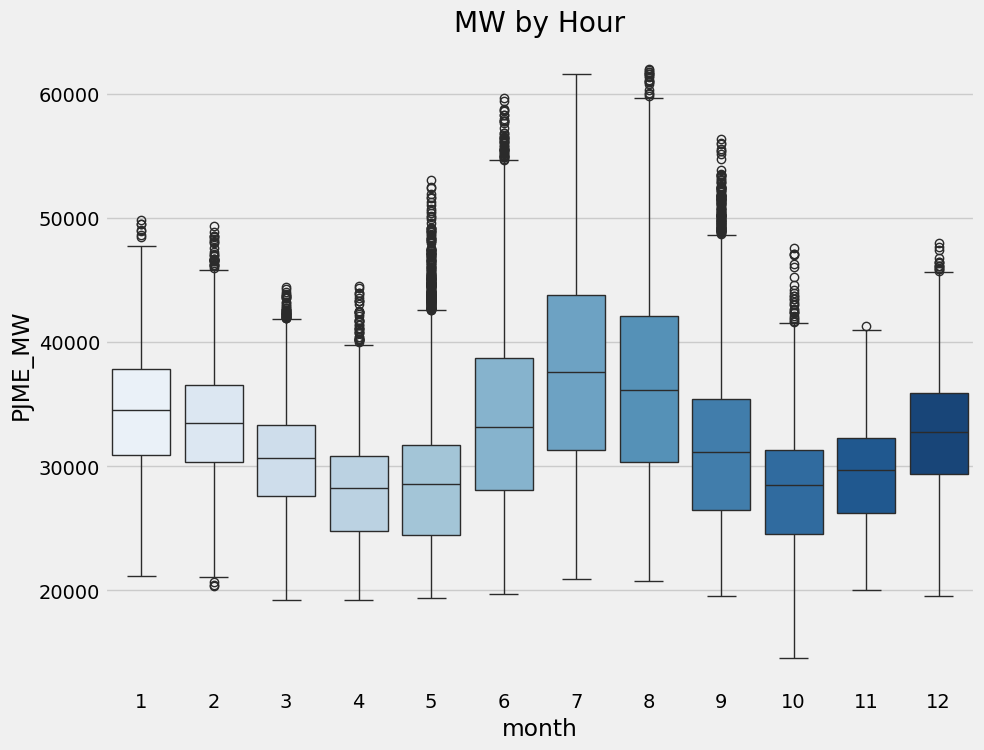

In [65]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Hour')
plt.show()

# Create our Model

In [66]:
train = create_features(train)
test = create_features(test)

In [67]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

In [68]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [75]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

ImportError: sklearn needs to be installed in order to use this module